HW #4 <br>
Noah Miller <br>
ECE 477 <br>


In [12]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as snd
import scipy.io as sci
import scipy
from HW4Functions import myNMF
from sklearn.decomposition import NMF


Q1 <br>
B. <br>

In [2]:
x, sr = librosa.load("sounds.wav", sr=None) # Loading in audio file

# Calculating the spectrogram of the audio file
S = librosa.stft(x,hop_length=512,win_length=2048, window='hamming',)
S_mag, S_phase = librosa.magphase(S)
S_db = librosa.amplitude_to_db(S_mag)

# NMF Parameters

r = 3
nIter = 100

[W,H,KL] = myNMF(S_mag,r,nIter)

Y = np.dot(W,H) # reconstructed Spectrogram


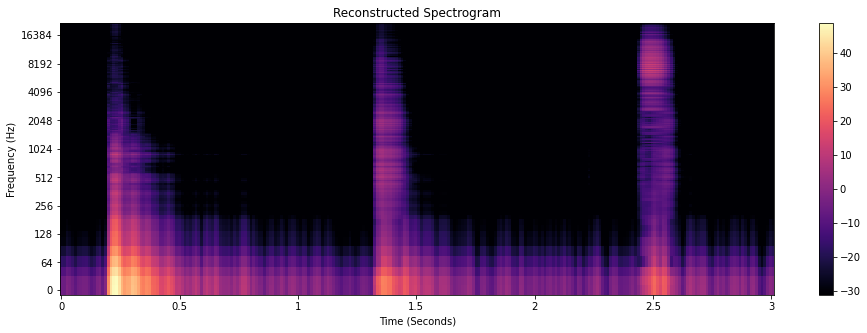

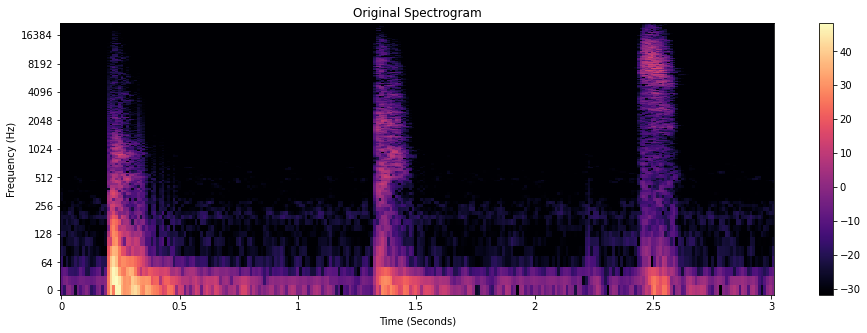

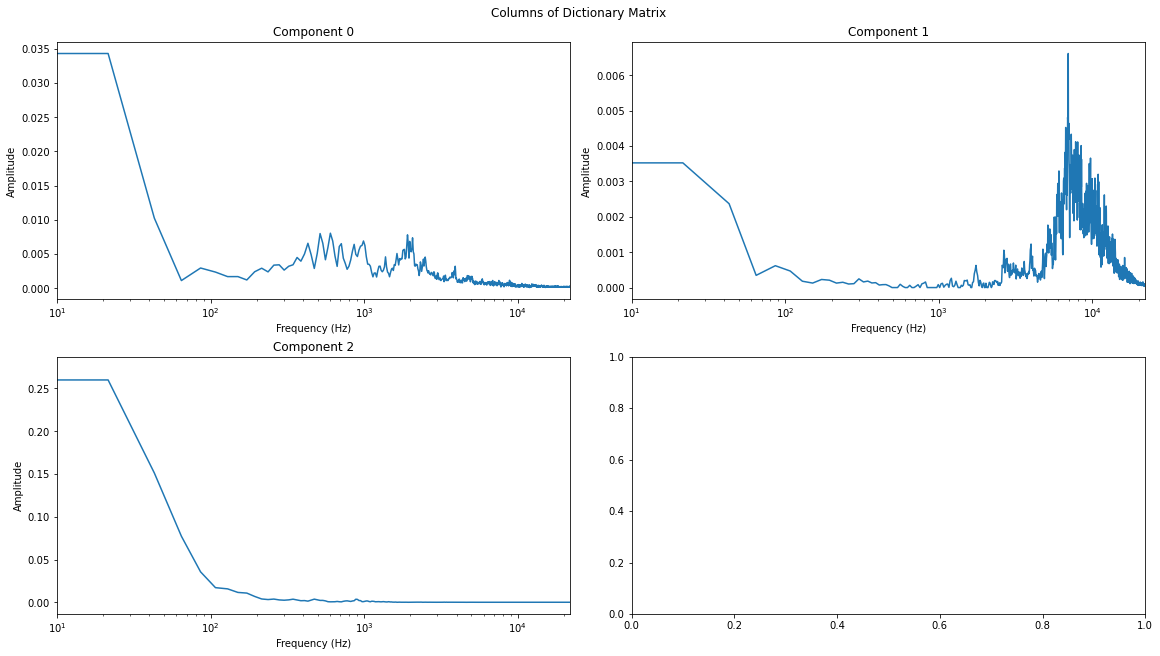

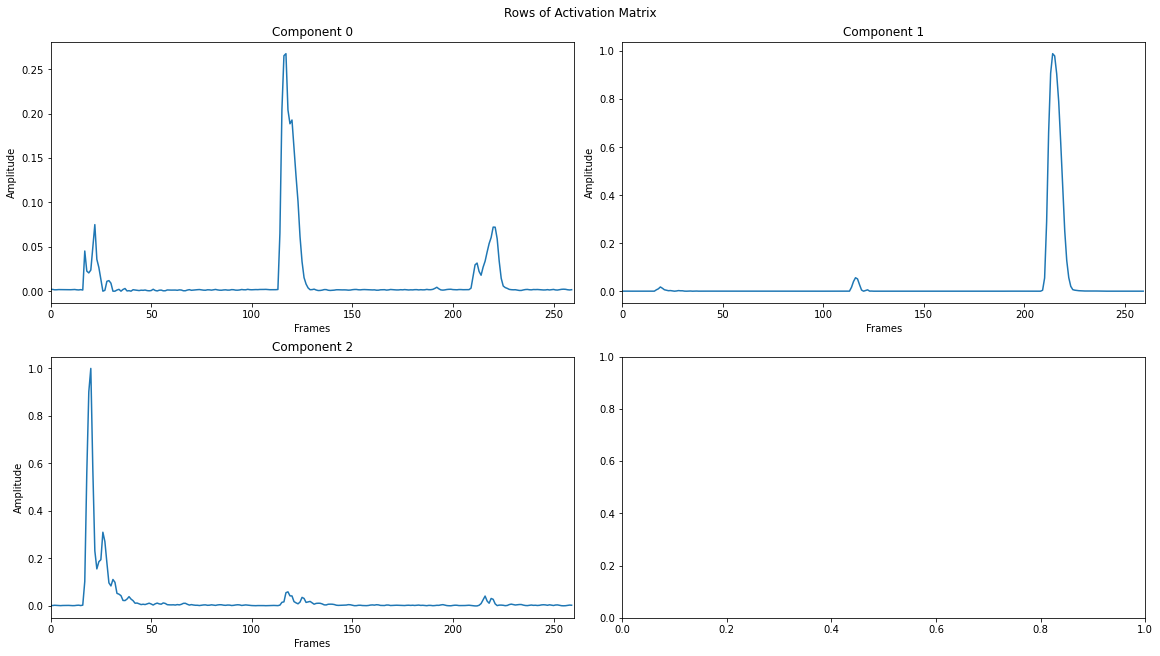

In [3]:

# Plotting reconstructed spectrogram
plt.figure(figsize=(16, 5))
Y_db = librosa.amplitude_to_db(Y)
librosa.display.specshow(Y_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Reconstructed Spectrogram")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (Hz)")

# Plotting original spectrogram
plt.figure(figsize=(16, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Original Spectrogram")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (Hz)")


freqs = librosa.fft_frequencies(sr=sr,n_fft=2048) # Calculating the frequency distribution for the STFT

# Plotting the dictionary matrix
fig, ax = plt.subplots(int(np.ceil(r/2)),2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Columns of Dictionary Matrix ")
axes = ax.flat
for n in range(r):
    axes[n].semilogx(freqs,W[:,n])
    axes[n].set_xlim(10, sr/2)
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frequency (Hz)')
    axes[n].set_ylabel('Amplitude')



H *= 1.0 / (H.max()) # Scaling the activation matrix
# Plotting the activation matrix
fig, ax = plt.subplots(int(np.ceil(r/2)),2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Rows of Activation Matrix")
axes = ax.flat
for n in range(r):
    axes[n].plot(H[n,:])
    axes[n].set_xlim(0, H.shape[1])
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frames')
    axes[n].set_ylabel('Amplitude')


y = librosa.istft(Y * S_phase, length = len(x), hop_length=512, win_length= 2048) # Inverse STFT 
snd.write('piano_recon_r4.wav',y,sr,subtype="PCM_16") # Saving reconstructed piano file

The reconstructed spectrogram looks very close to the original spectrogram, without many of the lower frequency artifacts, and the reconstructed audio sounds nearly identical to the normal one. 

C.

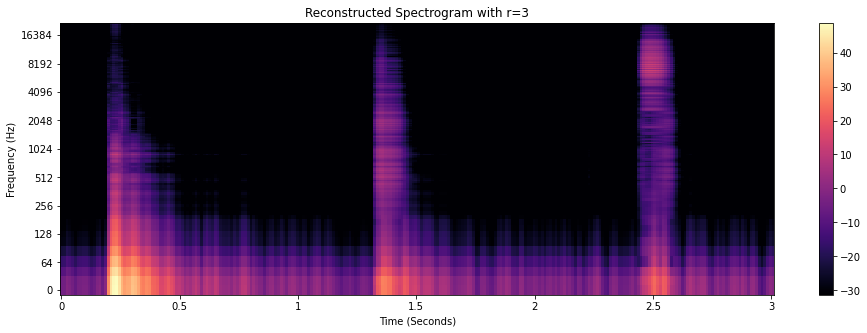

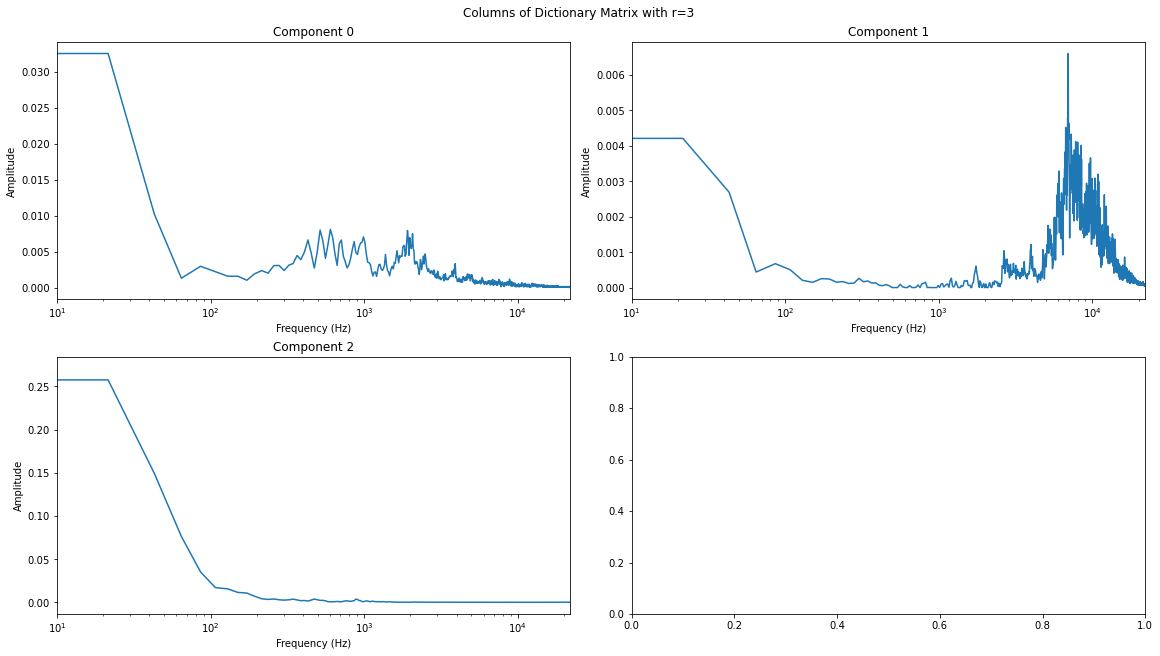

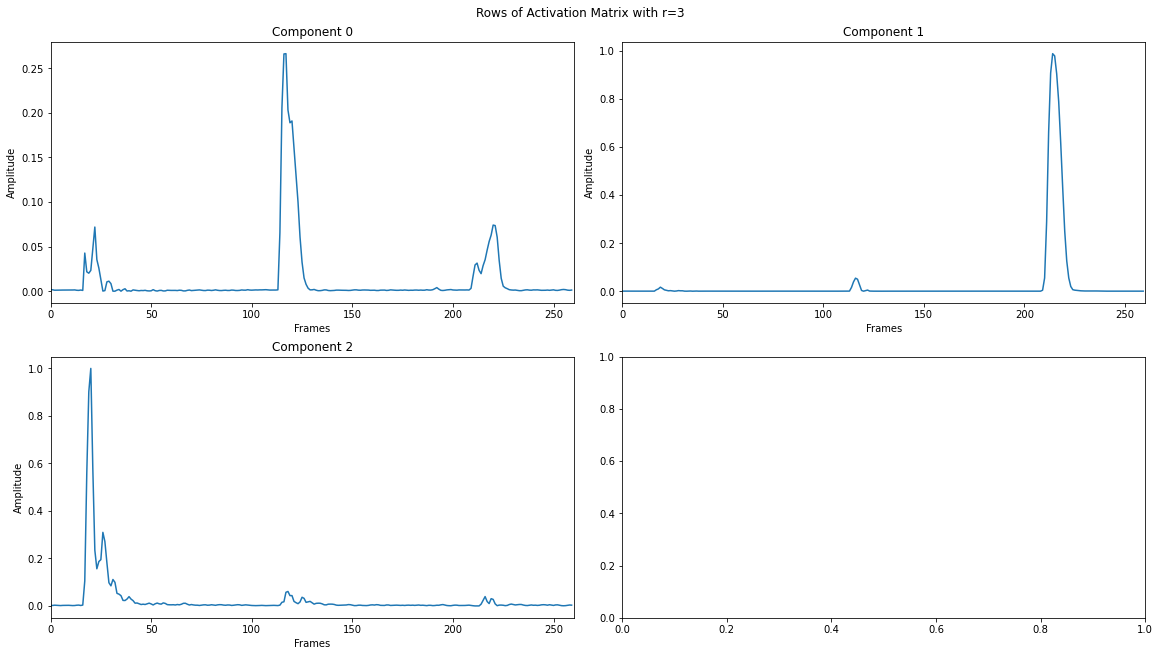

In [4]:
# NMF Parameters
r = 3
nIter = 50

[W,H,KL] = myNMF(S_mag,r,nIter)

Y = np.dot(W,H) # Reconstructed Spectrogram

# Plotting reconstructed spectrogram
plt.figure(figsize=(16, 5))
Y_db = librosa.amplitude_to_db(Y)
librosa.display.specshow(Y_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Reconstructed Spectrogram with r=3")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (Hz)")

freqs = librosa.fft_frequencies(sr=sr,n_fft=2048) # Calculating the frequency distribution for the STFT

# Plotting the dictionary matrix
fig, ax = plt.subplots(int(np.ceil(r/2)),2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Columns of Dictionary Matrix with r=3 ")
axes = ax.flat
for n in range(r):
    axes[n].semilogx(freqs,W[:,n])
    axes[n].set_xlim(10, sr/2)
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frequency (Hz)')
    axes[n].set_ylabel('Amplitude')



H *= 1.0 / (H.max()) # Scaling the activation matrix
# Plotting the activation matrix
fig, ax = plt.subplots(int(np.ceil(r/2)),2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Rows of Activation Matrix with r=3")
axes = ax.flat
for n in range(r):
    axes[n].plot(H[n,:])
    axes[n].set_xlim(0, H.shape[1])
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frames')
    axes[n].set_ylabel('Amplitude')


y = librosa.istft(Y * S_phase, length = len(x), hop_length=512, win_length= 2048) # Inverse STFT 
snd.write('piano_recon_r3.wav',y,sr,subtype="PCM_16") # Saving reconstructed piano file

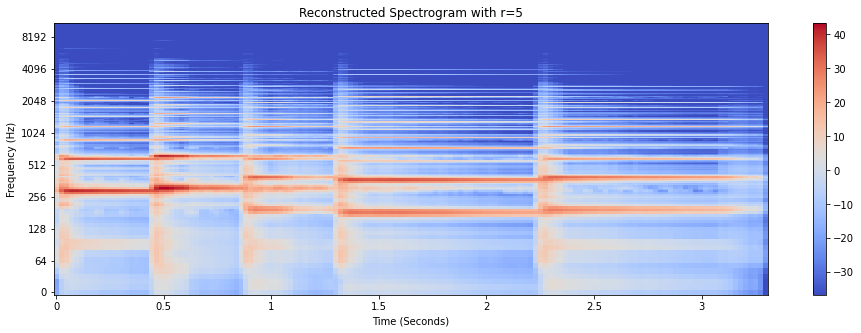

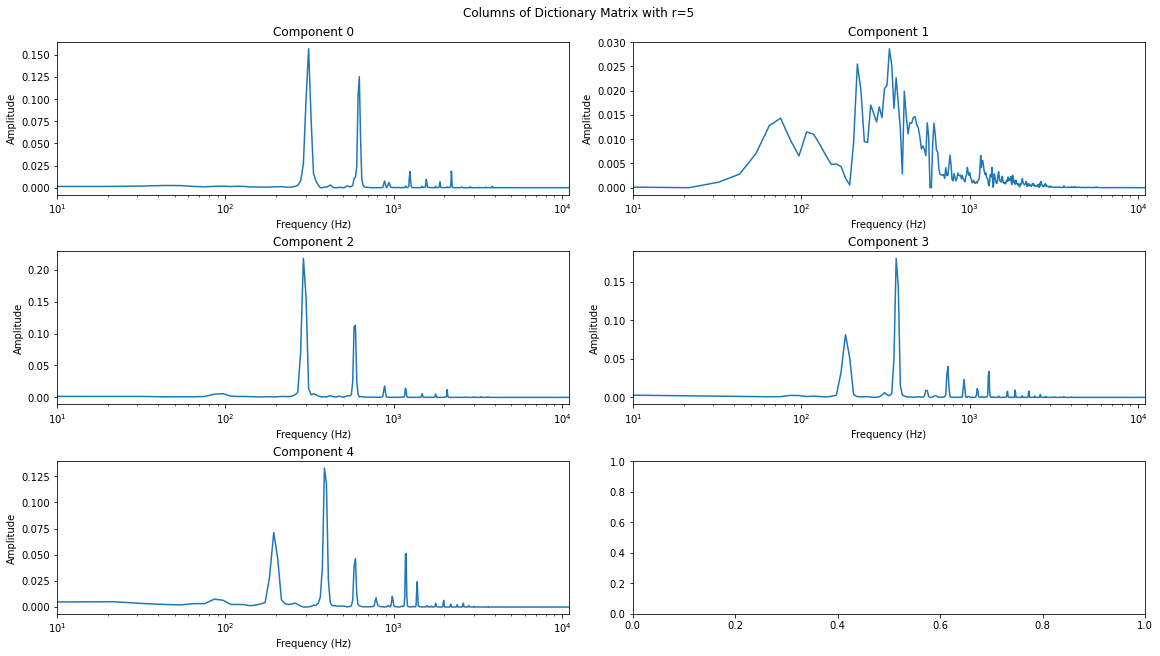

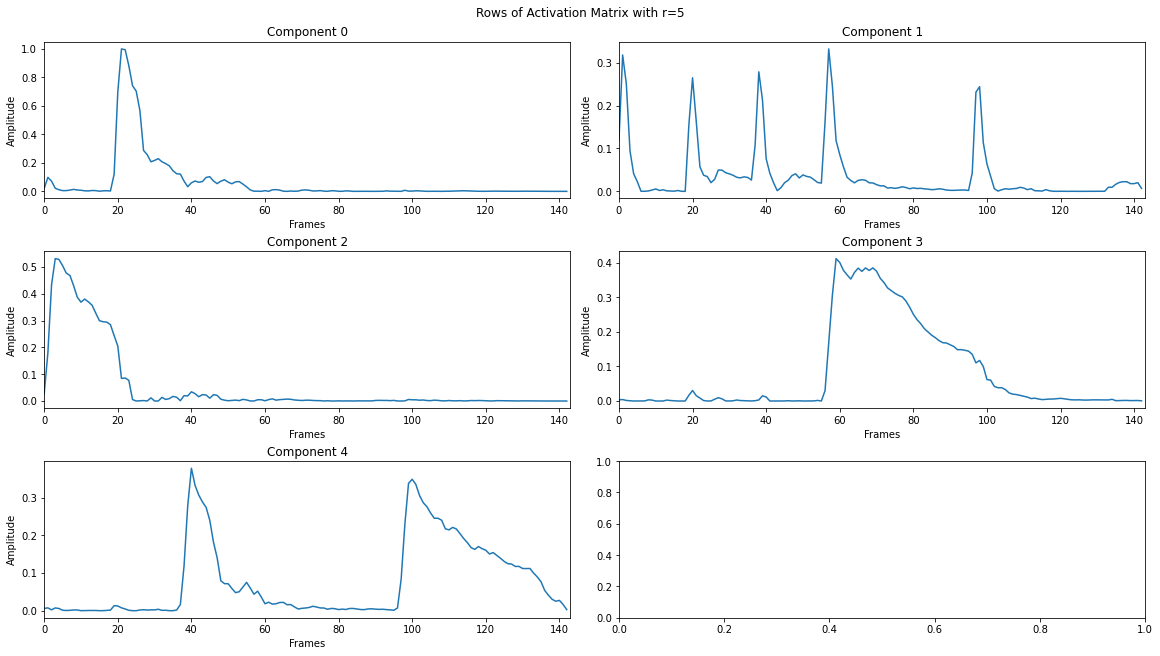

In [17]:
# NMF Parameters
r = 5
nIter = 50

[W,H,KL] = myNMF(S_mag,r,nIter)

Y = np.dot(W,H) # Reconstructed Spectrogram

# Plotting reconstructed spectrogram
plt.figure(figsize=(16, 5))
Y_db = librosa.amplitude_to_db(Y)
librosa.display.specshow(Y_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Reconstructed Spectrogram with r=5")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (Hz)")

freqs = librosa.fft_frequencies(sr=sr,n_fft=2048) # Calculating the frequency distribution for the STFT

# Plotting the dictionary matrix
fig, ax = plt.subplots(int(np.ceil(r/2)),2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Columns of Dictionary Matrix with r=5 ")
axes = ax.flat
for n in range(r):
    axes[n].semilogx(freqs,W[:,n])
    axes[n].set_xlim(10, sr/2)
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frequency (Hz)')
    axes[n].set_ylabel('Amplitude')



H *= 1.0 / (H.max()) # Scaling the activation matrix
# Plotting the activation matrix
fig, ax = plt.subplots(int(np.ceil(r/2)),2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Rows of Activation Matrix with r=5")
axes = ax.flat
for n in range(r):
    axes[n].plot(H[n,:])
    axes[n].set_xlim(0, H.shape[1])
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frames')
    axes[n].set_ylabel('Amplitude')


y = librosa.istft(Y * S_phase, length = len(x), hop_length=512, win_length= 2048) # Inverse STFT 
snd.write('piano_recon_r5.wav',y,sr,subtype="PCM_16") # Saving reconstructed piano file

Each column in W represents the fundamental frequency and harmonics of a note. With an r value less than 4, like 3, some of the reconstructed notes sound correct, while some sound like a combination of multiple notes. An r value greater than 4 still sounds the same when reconstructed. 

D.

In [3]:

# Training Speech dictionary
x, sr = librosa.load("sounds.wav", sr=None) # Loading in audio file

# Calculating the spectrogram of the audio file
S = librosa.stft(x,hop_length=512,win_length=1024, window='hamming', n_fft=1024)
S_mag, S_phase = librosa.magphase(S)
S_db = librosa.amplitude_to_db(S_mag)

# NMF Parameters
r = 3
nIter = 200

[W_Speech,H,KL] = myNMF(S_mag,r,nIter)

Y_Speech = np.dot(W_Speech,H) # Reconstructed Spectrogram

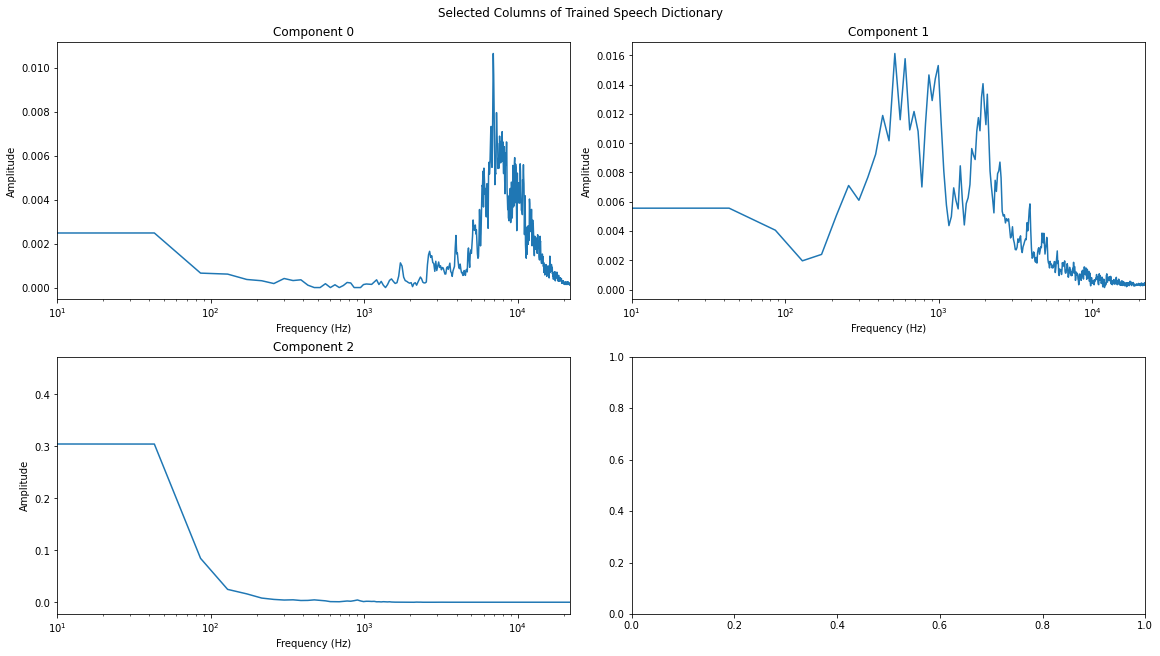

In [4]:
# Plotting the dictionary matrix
freqs = librosa.fft_frequencies(sr=sr,n_fft=1024,) # Calculating the frequency distribution for the STFT
fig, ax = plt.subplots(2,2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Selected Columns of Trained Speech Dictionary")
axes = ax.flat
for n in range(3):
    axes[n].semilogx(freqs,W_Speech[:,n])
    axes[n].set_xlim(10, sr/2)
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frequency (Hz)')
    axes[n].set_ylabel('Amplitude')

In [146]:

# Training Noise dictionary
x, sr = librosa.load("noise_train.wav", sr=None) # Loading in audio file

# Calculating the spectrogram of the audio file
S = librosa.stft(x,hop_length=512,win_length=1024, window='hamming', n_fft=1024)
S_mag, S_phase = librosa.magphase(S)
S_db = librosa.amplitude_to_db(S_mag)

# NMF Parameters
r = 100
nIter = 75

[W_Noise,H,KL] = myNMF(S_mag,r,nIter)

Y_Noise = np.dot(W_Noise,H) # Reconstructed Spectrogram

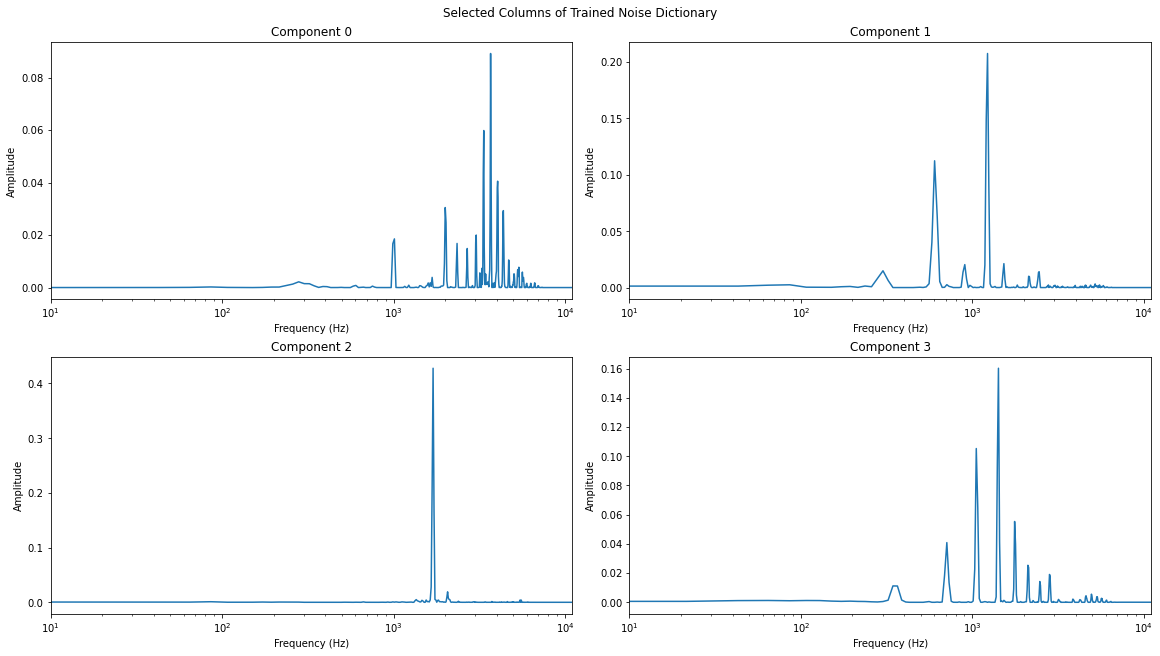

In [75]:

# Plotting the dictionary matrix
freqs = librosa.fft_frequencies(sr=sr,n_fft=1024) # Calculating the frequency distribution for the STFT
fig, ax = plt.subplots(2,2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Selected Columns of Trained Noise Dictionary")
axes = ax.flat
for n in range(4):
    axes[n].semilogx(freqs,W_Noise[:,n])
    axes[n].set_xlim(10, sr/2)
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frequency (Hz)')
    axes[n].set_ylabel('Amplitude')

In [26]:
# Separating Noisy Speech


x, sr = librosa.load("beatboxtest.wav", sr=None) # Loading in audio file

# Calculating the spectrogram of the audio file
S = librosa.stft(x,hop_length=512,win_length=1024, window='hamming', n_fft=1024)
S_mag, S_phase = librosa.magphase(S)
S_db = librosa.amplitude_to_db(S_mag)

# NMF Parameters
r = 3
nIter = 200
[m,n] = S_mag.shape
H = np.random.rand(r,n)
H = H.astype('float32')
W_Speech = W_Speech.astype('float32')

model = NMF(n_components=r, init='custom', max_iter=500);
W_Combo = model.fit_transform(S_mag, H=H, W=W_Speech)
H = model.components_

# [W_Combo,H,KL] = myNMF(S_mag,r,nIter,bUpdateW=0,initW=W_Speech)
# W, H = librosa.decompose.decompose(S_mag, n_components=r, sort=True, init='custom', W= W_Speech, H =H)


In [20]:
S_mag

array([[6.6983044e-01, 1.6316839e+01, 7.1373222e+01, ..., 3.2354295e+00,
        3.0233715e+00, 1.2846988e+00],
       [5.6566554e-01, 1.4369953e+01, 7.4853195e+01, ..., 1.4024013e+00,
        1.3550457e+00, 9.6483451e-01],
       [3.2865947e-01, 1.0663109e+01, 3.8156193e+01, ..., 4.6888620e-02,
        4.6131894e-02, 4.1080534e-01],
       ...,
       [1.7805295e-03, 1.0921451e-02, 8.6247055e-03, ..., 2.4302860e-03,
        3.8879772e-03, 2.4660847e-03],
       [1.6838331e-03, 1.0188057e-02, 4.2294506e-03, ..., 2.3696800e-03,
        1.8154798e-03, 1.4807915e-03],
       [7.3064241e-04, 1.3324367e-02, 9.8559298e-03, ..., 1.8992234e-03,
        2.4947196e-03, 1.0106828e-03]], dtype=float32)

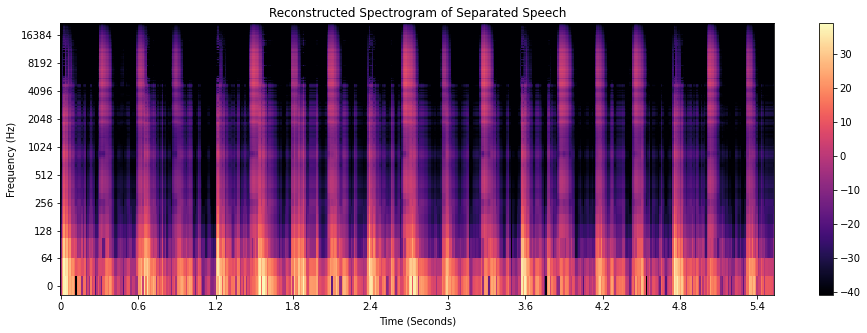

In [27]:
Y_beatbox = np.dot(W_Combo,H) # Reconstructed Spectrogram
y_beatbox = librosa.istft(Y_beatbox * S_phase, length = len(x) - 500, hop_length=512, win_length= 1024, n_fft=1024) # Inverse STFT 

plt.figure(figsize=(16, 5))
Y_db = librosa.amplitude_to_db(Y_beatbox)
librosa.display.specshow(Y_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Reconstructed Spectrogram of Separated Speech")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (Hz)")



# Saving separated reconstructions
snd.write('speech_sep.wav',y_beatbox,sr,subtype="PCM_16")
# snd.write('noise_sep.wav',y_SepNoise,sr,subtype='PCM_16')

In [28]:
for n in range(r):
    
    # Re-create the STFT of a single NMF component.
    Y = np.outer(W_Combo[:,n], H[n])*S_phase
    
    # Transform the STFT into the time domain.
    y = librosa.istft(Y)
    
    print('Component {}:'.format(n))
    display(Audio(data=y, rate=sr))

Component 0:


Component 1:


Component 2:


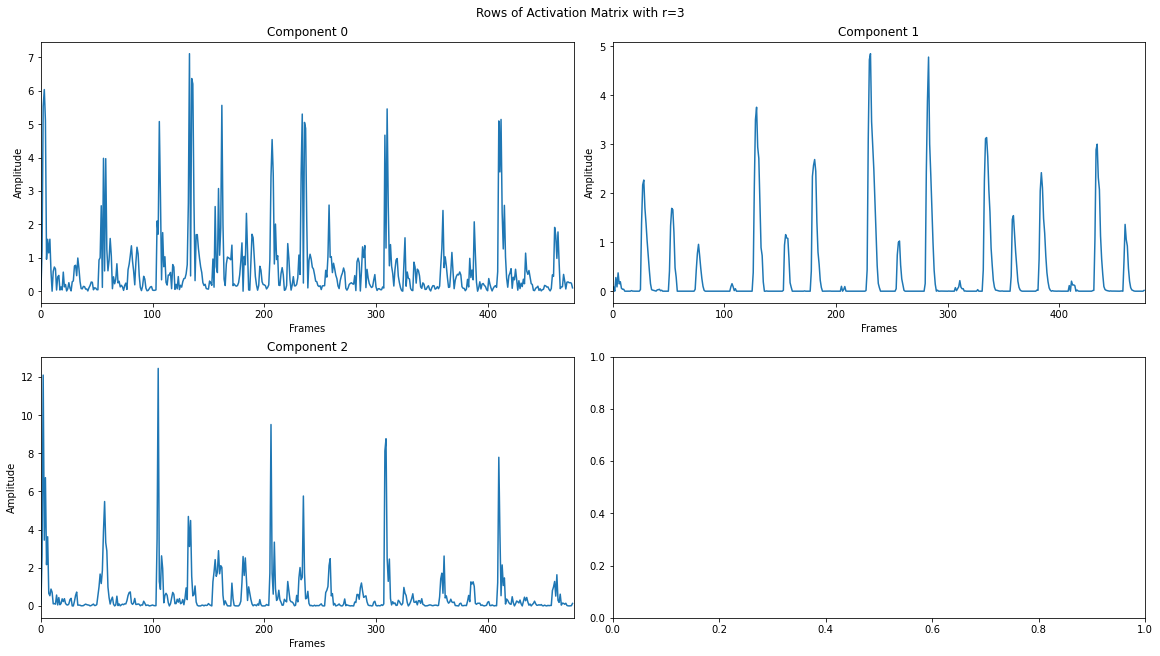

In [29]:
 # Scaling the activation matrix
# Plotting the activation matrix
fig, ax = plt.subplots(int(np.ceil(r/2)),2,constrained_layout=True, figsize=(16,9))
fig.suptitle("Rows of Activation Matrix with r=3")
axes = ax.flat
for n in range(r):
    # H[n,:] *= 1.0 / (H[n,:].max())
    axes[n].plot(H[n,:])
    axes[n].set_xlim(0, H.shape[1])
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frames')
    axes[n].set_ylabel('Amplitude')


When evaluating with the bss_eval toolbox, I received these evaluation results. <br>
For the speech source, I received an SAR of 11.02dB, an SIR of 8.25dB, and an SDR of 6.19dB. <br>
For the noise source, I received an SAR of 6.68dB, an SIR of 12.09dB, and an SDR of 5.38dB. 

Q #2 <br>
B.

In [2]:
x, sr = librosa.load("female_factory.wav",sr=None)


# Calculating the spectrogram of the audio file
S = librosa.stft(x,hop_length=160,win_length=1024, window='hamming', n_fft=4096)
S_mag, S_phase = librosa.magphase(S)
S_db = librosa.amplitude_to_db(S_mag)

In [12]:
# Loading Matlab data
matFile = sci.loadmat("pitchdata.mat")
loglikeMat = matFile["loglikeMat"].T
initProb = matFile["initProb"]
transMat = matFile["transMat"]


# Calculating initial pitch estimates from states
estimate = np.zeros((len(loglikeMat),1))
for i in range(len(loglikeMat)):
    estimate[i] = np.argmax(loglikeMat[i])
estimate_freq = 440 * 2 ** ((((estimate - 2) * 0.5 + 35.25)-69)/12)

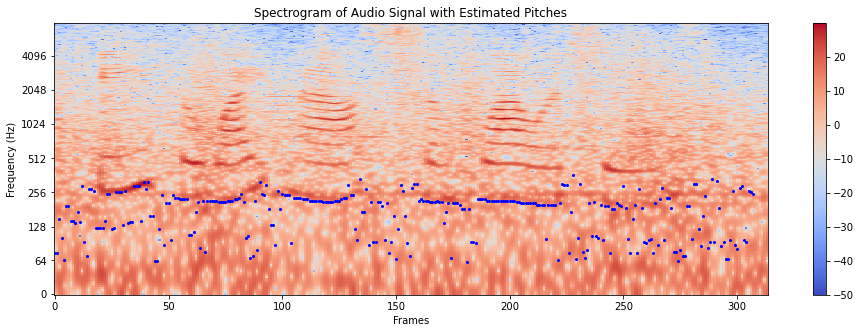

In [13]:
# Plotting Pitch Estimates over spectrogram
plt.figure(figsize=(16, 5))
librosa.display.specshow(S_db, sr=sr,x_axis='frames', y_axis='log', hop_length=160,win_length=1024,n_fft=4096)
plt.plot(estimate_freq,'bo',ms=2)
plt.colorbar()
plt.title("Spectrogram of Audio Signal with Estimated Pitches")
plt.xlabel("Frames")
plt.ylabel("Frequency (Hz)")
plt.show()

c:\Users\nmsup\Documents\School\ECE_477\HW4\HW4Functions.py:101: RuntimeWarning: divide by zero encountered in log
  V[:,0] = np.log(initProb[:,0]) + loglikeMat[:,0] # Initial value
c:\Users\nmsup\Documents\School\ECE_477\HW4\HW4Functions.py:105: RuntimeWarning: divide by zero encountered in log
  delt = np.log(transMat[:,j]) + V[:,i-1]


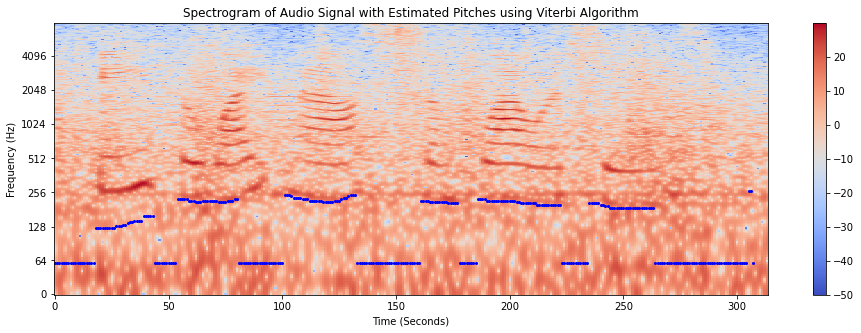

In [15]:
# Running Viterbi Algorithm
path = myViterbi(transMat,loglikeMat.T,initProb)
estimate_freq = 440 * 2 ** ((((path - 2) * 0.5 + 35.25)-69)/12)

plt.figure(figsize=(16, 5))
librosa.display.specshow(S_db, sr=sr,x_axis='frames', y_axis='log', hop_length=160,win_length=1024,n_fft=4096)
plt.plot(estimate_freq,'bo',ms=2)
plt.colorbar()
plt.title("Spectrogram of Audio Signal with Estimated Pitches using Viterbi Algorithm")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (Hz)")
plt.show()

The estimates generated using the Viterbi algorithm seem to be significantly more accurate than the original estimate.